# Projeto: Análise da Base de Clientes

Projeto de análise de dados focado na base de clientes de uma dada empresa, com o objetivo de identificar padrões de comportamento e segmentar os clientes. Utilizando ferramentas da linguagem Python para gerar insights e assim otimizar estratégias de marketing e melhorar a experiência do cliente.

OBS: O item 6 deste projeto exibe o Relatório Final da Análise.

### 1. Importando a base de dados:

In [1]:
import pandas as pd 

base_clientes = pd.read_csv('base_clientes.csv')

display(base_clientes)

,ID_Cliente,Nome,Sobrenome,Data_Nascimento,Estado_Civil,Sexo,Email,Telefone,Renda_Anual,Qtd_Filhos,Escolaridade
0,1,Ruben,Torres,1985-08-07,C,M,ruben35@hotmail.com,(85) 94132-1176,60000,3,Pós-graduado
1,2,Christy,Zhu,1988-02-10,S,F,christy12@hotmail.com,(41) 96270-6086,70000,0,Pós-graduado
2,3,Elizabeth,Johnson,1988-08-03,S,F,elizabeth5@gmail.com,(31) 92039-5832,80000,5,Pós-graduado
3,4,Julio,Ruiz,1985-07-31,S,M,julio1@hotmail.com,(62) 93391-5891,70000,0,Pós-graduado
4,5,Janet,Alvarez,1985-12-01,S,F,janet9@gmail.com,(21) 93379-3743,70000,0,Pós-graduado
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mallory,Rubio,1981-04-26,S,F,mallory7@hotmail.com,(62) 93152-6617,60000,1,Parcial
96,97,Adam,Ross,1981-03-03,C,M,adam2@hotmail.com,(31) 96502-3482,60000,1,Pós-graduado
97,98,Latasha,Navarro,1980-09-10,S,F,latasha10@yahoo.com.br,NaN,60000,1,Parcial
98,99,Abby,Sai,1985-05-03,S,F,abby4@hotmail.com,(85) 98841-5381,70000,0,Pós-graduado


--- 

### 2. Verificando informações da base de dados:

In [2]:
linhas, colunas = base_clientes.shape

print(f'A base de dados em análise possui {linhas} linhas e {colunas} colunas.')

A base de dados em análise possui 100 linhas e 11 colunas.


In [3]:
base_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_Cliente       100 non-null    int64 
 1   Nome             100 non-null    object
 2   Sobrenome        100 non-null    object
 3   Data_Nascimento  100 non-null    object
 4   Estado_Civil     100 non-null    object
 5   Sexo             100 non-null    object
 6   Email            100 non-null    object
 7   Telefone         93 non-null     object
 8   Renda_Anual      100 non-null    int64 
 9   Qtd_Filhos       100 non-null    int64 
 10  Escolaridade     100 non-null    object
dtypes: int64(3), object(8)
memory usage: 8.7+ KB


Observa-se que a base de dados em análise possui 100 linhas e 11 colunas. Além disso, dentre os 100 registros, no campo 'Telefone' há 7 valores nulos.

Dada a natureza do campo, os valores nulos não comprometem a análise da base.

---

### 3. Removendo e adicionando colunas:

Na presente fase serão removidas as colunas 'Email' e 'Telefone', que não influenciarão a análise e será acrescentada uma nova coluna chamada 'Idade', que será úlil para fins estatísticos.

#### Excluindo colunas:

In [4]:
base = base_clientes.drop('Email', axis=1)
base = base.drop('Telefone', axis=1)

display(base)

,ID_Cliente,Nome,Sobrenome,Data_Nascimento,Estado_Civil,Sexo,Renda_Anual,Qtd_Filhos,Escolaridade
0,1,Ruben,Torres,1985-08-07,C,M,60000,3,Pós-graduado
1,2,Christy,Zhu,1988-02-10,S,F,70000,0,Pós-graduado
2,3,Elizabeth,Johnson,1988-08-03,S,F,80000,5,Pós-graduado
3,4,Julio,Ruiz,1985-07-31,S,M,70000,0,Pós-graduado
4,5,Janet,Alvarez,1985-12-01,S,F,70000,0,Pós-graduado
...,...,...,...,...,...,...,...,...,...
95,96,Mallory,Rubio,1981-04-26,S,F,60000,1,Parcial
96,97,Adam,Ross,1981-03-03,C,M,60000,1,Pós-graduado
97,98,Latasha,Navarro,1980-09-10,S,F,60000,1,Parcial
98,99,Abby,Sai,1985-05-03,S,F,70000,0,Pós-graduado


In [5]:
base['Data_Nascimento'] = pd.to_datetime(base['Data_Nascimento'])

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_Cliente       100 non-null    int64         
 1   Nome             100 non-null    object        
 2   Sobrenome        100 non-null    object        
 3   Data_Nascimento  100 non-null    datetime64[ns]
 4   Estado_Civil     100 non-null    object        
 5   Sexo             100 non-null    object        
 6   Renda_Anual      100 non-null    int64         
 7   Qtd_Filhos       100 non-null    int64         
 8   Escolaridade     100 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 7.2+ KB


#### Criando a nova coluna [Idade]

(*) Idade em anos completos.

In [6]:
from datetime import datetime

hoje = datetime(2024, 8, 21)

print(hoje)

2024-08-21 00:00:00


In [7]:
base['Idade'] = hoje - base['Data_Nascimento']

base.head()

,ID_Cliente,Nome,Sobrenome,Data_Nascimento,Estado_Civil,Sexo,Renda_Anual,Qtd_Filhos,Escolaridade,Idade
0,1,Ruben,Torres,1985-08-07,C,M,60000,3,Pós-graduado,14259 days
1,2,Christy,Zhu,1988-02-10,S,F,70000,0,Pós-graduado,13342 days
2,3,Elizabeth,Johnson,1988-08-03,S,F,80000,5,Pós-graduado,13167 days
3,4,Julio,Ruiz,1985-07-31,S,M,70000,0,Pós-graduado,14266 days
4,5,Janet,Alvarez,1985-12-01,S,F,70000,0,Pós-graduado,14143 days


In [8]:
base['Idade'] = base['Idade'].apply(lambda x: int((abs(x).days) / 365))

base.head()

,ID_Cliente,Nome,Sobrenome,Data_Nascimento,Estado_Civil,Sexo,Renda_Anual,Qtd_Filhos,Escolaridade,Idade
0,1,Ruben,Torres,1985-08-07,C,M,60000,3,Pós-graduado,39
1,2,Christy,Zhu,1988-02-10,S,F,70000,0,Pós-graduado,36
2,3,Elizabeth,Johnson,1988-08-03,S,F,80000,5,Pós-graduado,36
3,4,Julio,Ruiz,1985-07-31,S,M,70000,0,Pós-graduado,39
4,5,Janet,Alvarez,1985-12-01,S,F,70000,0,Pós-graduado,38


In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_Cliente       100 non-null    int64         
 1   Nome             100 non-null    object        
 2   Sobrenome        100 non-null    object        
 3   Data_Nascimento  100 non-null    datetime64[ns]
 4   Estado_Civil     100 non-null    object        
 5   Sexo             100 non-null    object        
 6   Renda_Anual      100 non-null    int64         
 7   Qtd_Filhos       100 non-null    int64         
 8   Escolaridade     100 non-null    object        
 9   Idade            100 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 7.9+ KB


---

### 4. Transformando o conteúdo das colunas Estado_Civil e Sexo:

##### a) Verificando dados únicos:

In [10]:
base['Estado_Civil'].unique()

array(['C', 'S'], dtype=object)

In [11]:
base['Sexo'].unique()

array(['M', 'F'], dtype=object)

##### b) Tranformando Estado Civil para 'Casado(a)' ou 'Soleito(a)':

In [12]:
base['Estado_Civil'] = base['Estado_Civil'].str.replace('C', 'Casado(a)').replace('S', 'Solteiro(a)')

base.head()

,ID_Cliente,Nome,Sobrenome,Data_Nascimento,Estado_Civil,Sexo,Renda_Anual,Qtd_Filhos,Escolaridade,Idade
0,1,Ruben,Torres,1985-08-07,Casado(a),M,60000,3,Pós-graduado,39
1,2,Christy,Zhu,1988-02-10,Solteiro(a),F,70000,0,Pós-graduado,36
2,3,Elizabeth,Johnson,1988-08-03,Solteiro(a),F,80000,5,Pós-graduado,36
3,4,Julio,Ruiz,1985-07-31,Solteiro(a),M,70000,0,Pós-graduado,39
4,5,Janet,Alvarez,1985-12-01,Solteiro(a),F,70000,0,Pós-graduado,38


##### c) Transformando Sexo para 'Masculino' ou 'Feminino':

In [13]:
base['Sexo'] = base['Sexo'].str.replace('M', 'Masculino').replace('F', 'Feminino')

base.head()

,ID_Cliente,Nome,Sobrenome,Data_Nascimento,Estado_Civil,Sexo,Renda_Anual,Qtd_Filhos,Escolaridade,Idade
0,1,Ruben,Torres,1985-08-07,Casado(a),Masculino,60000,3,Pós-graduado,39
1,2,Christy,Zhu,1988-02-10,Solteiro(a),Feminino,70000,0,Pós-graduado,36
2,3,Elizabeth,Johnson,1988-08-03,Solteiro(a),Feminino,80000,5,Pós-graduado,36
3,4,Julio,Ruiz,1985-07-31,Solteiro(a),Masculino,70000,0,Pós-graduado,39
4,5,Janet,Alvarez,1985-12-01,Solteiro(a),Feminino,70000,0,Pós-graduado,38


---

### 5. Analisando a Base de Clientes:

##### a) Total de clientes:

In [59]:
total_clientes = base['ID_Cliente'].count()

texto_total_clientes = f'A base de dados analisada possui um total de {total_clientes} clientes cadastrados.'

print(texto_total_clientes)

A base de dados analisada possui um total de 100 clientes cadastrados.


##### b) Análise por gênero:

In [55]:
sexo_m = (base['Sexo'] == 'Masculino').sum()
sexo_f = (base['Sexo'] == 'Feminino').sum()

texto_qtd_genero = f'A base de dados analisada possui {sexo_m} clientes do sexo Masculino e {sexo_f} do sexo Feminino.'

print(texto_qtd_genero)

A base de dados analisada possui 48 clientes do sexo Masculino e 52 do sexo Feminino.


Text(0, 0.5, '')

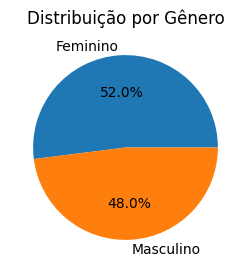

In [16]:
import matplotlib.pyplot as plt

base_genero = base['Sexo'].value_counts()
base_genero.plot(kind='pie', figsize=(6, 3), autopct='%1.1f%%')
plt.title('Distribuição por Gênero')
plt.ylabel('')

##### c) Análise por estado civil:

In [56]:
casados = (base['Estado_Civil'] == 'Casado(a)').sum()
solteiros = (base['Estado_Civil'] == 'Solteiro(a)').sum()

texto_qtd_ec = f'A base de dados analisada possui {casados} clientes casado(a)s e {solteiros} solteiro(a)s.'

print(texto_qtd_ec)

A base de dados analisada possui 56 clientes casado(a)s e 44 solteiro(a)s.


Text(0, 0.5, '')

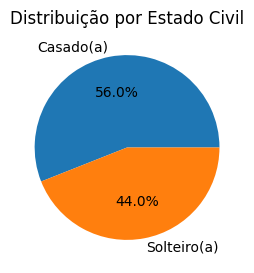

In [18]:
base_ec = base['Estado_Civil'].value_counts()
base_ec.plot(kind='pie', figsize=(6, 3), autopct='%1.1f%%')
plt.title('Distribuição por Estado Civil')
plt.ylabel('')

##### d) Relação sexo x estado civil:

In [19]:
tb_sexo_ec = pd.crosstab(base['Sexo'], base['Estado_Civil'])
display(tb_sexo_ec)

Estado_Civil,Casado(a),Solteiro(a)
Sexo,,
Feminino,23,29
Masculino,33,15


Text(0.5, 0, '')

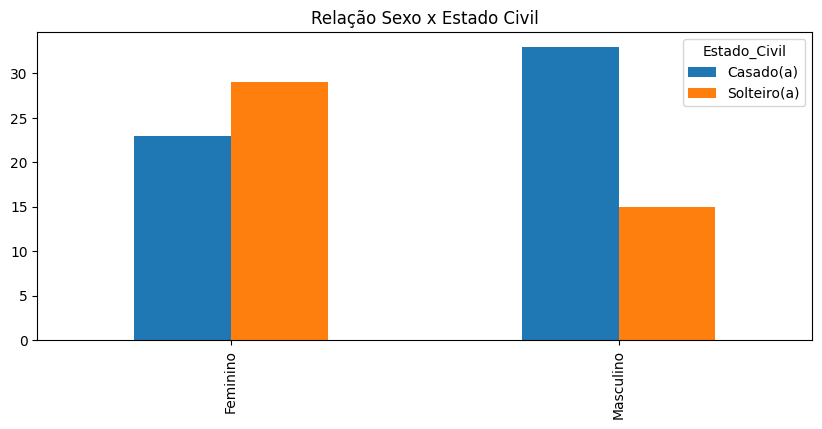

In [20]:
tb_sexo_ec.plot(kind='bar', figsize=(10, 4))
plt.title('Relação Sexo x Estado Civil')
plt.xlabel('')

In [57]:
homens_casados = base[(base['Sexo'] == "Masculino") & (base['Estado_Civil'] == "Casado(a)")]
casados = homens_casados.shape[0]

mulheres_casadas = base[(base['Sexo'] == "Feminino") & (base['Estado_Civil'] == "Casado(a)")]
casadas = mulheres_casadas.shape[0]

texto_sexo_ec = f'A proporção de homens casados é de {(casados / sexo_m) * 100:.1f}%, enquanto a proporção de mulheres casadas é de {(casadas / sexo_f) * 100:.1f}%.'

print(texto_sexo_ec)

A proporção de homens casados é de 68.8%, enquanto a proporção de mulheres casadas é de 44.2%.


##### e) Análise por escolaridade:

In [22]:
base['Escolaridade'].unique()

array(['Pós-graduado', 'Parcial', 'Ensino médio', 'Graduação'],
      dtype=object)

In [58]:
parc = (base['Escolaridade'] == 'Parcial').sum()
med = (base['Escolaridade'] == 'Ensino médio').sum()
grad = (base['Escolaridade'] == 'Graduação').sum()
pos = (base['Escolaridade'] == 'Pós-graduado').sum()

texto_esc = f'Do total de clientes, {parc} possuem nível de escolaridade Parcial, {med} possuem Nível Médio, {grad} possuem Formação Fuperior e {pos} Pós-graduação.'

print(texto_esc)

Do total de clientes, 46 possuem nível de escolaridade Parcial, 27 possuem Nível Médio, 6 possuem Formação Fuperior e 21 Pós-graduação.


Text(0.5, 1.0, 'Distribuição de clientes por Escolaridade')

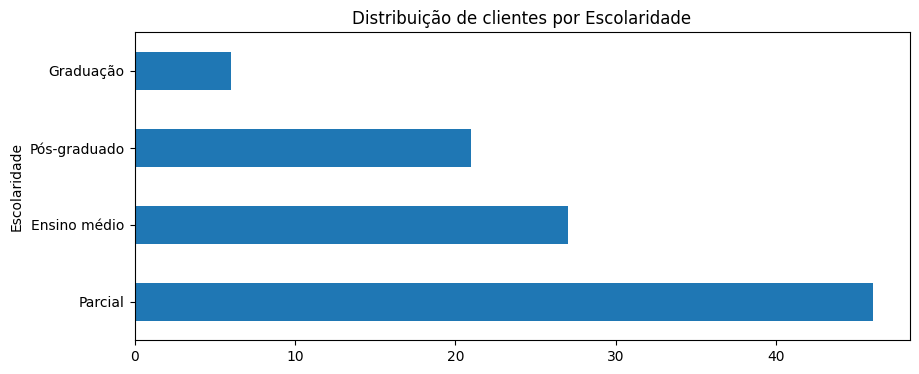

In [24]:
base_esc = base['Escolaridade'].value_counts()
base_esc.plot(kind='barh', figsize=(10, 4))
plt.title('Distribuição de clientes por Escolaridade')

##### f) Relação sexo x escolaridade:

In [25]:
tb_sexo_esc = pd.crosstab(base['Sexo'], base['Escolaridade'])
display(tb_sexo_esc)

Escolaridade,Ensino médio,Graduação,Parcial,Pós-graduado
Sexo,,,,
Feminino,16,3,21,12
Masculino,11,3,25,9


Text(0.5, 0, '')

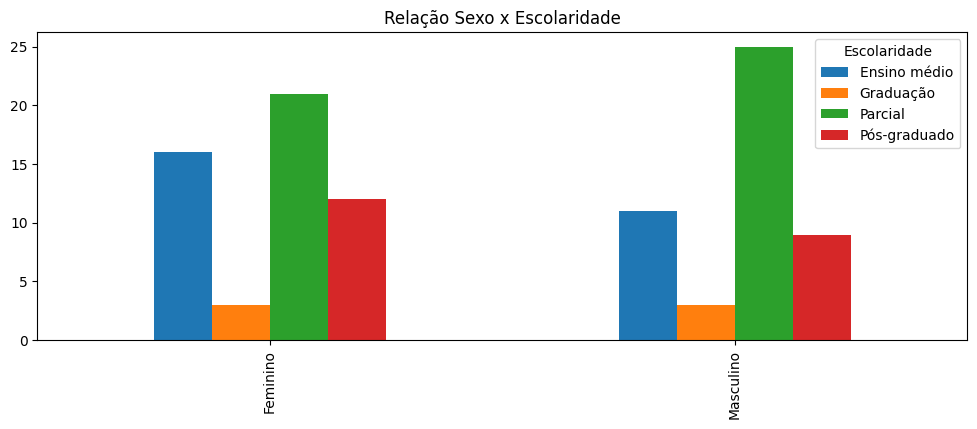

In [28]:
tb_sexo_esc.plot(kind='bar', figsize=(12, 4))
plt.title('Relação Sexo x Escolaridade')
plt.xlabel('')

In [30]:
h_parc = base[(base['Sexo'] == "Masculino") & (base['Escolaridade'] == "Parcial")]
h_parcial = h_parc.shape[0]

h_med = base[(base['Sexo'] == "Masculino") & (base['Escolaridade'] == "Ensino médio")]
h_medio = h_med.shape[0]

h_grad = base[(base['Sexo'] == "Masculino") & (base['Escolaridade'] == "Graduação")]
h_graduacao = h_grad.shape[0]

h_pos = base[(base['Sexo'] == "Masculino") & (base['Escolaridade'] == "Pós-graduado")]
h_posgrad = h_pos.shape[0]

m_parc = base[(base['Sexo'] == "Feminino") & (base['Escolaridade'] == "Parcial")]
m_parcial = m_parc.shape[0]

m_med = base[(base['Sexo'] == "Feminino") & (base['Escolaridade'] == "Ensino médio")]
m_medio = m_med.shape[0]

m_grad = base[(base['Sexo'] == "Feminino") & (base['Escolaridade'] == "Graduação")]
m_graduacao = m_grad.shape[0]

m_pos = base[(base['Sexo'] == "Feminino") & (base['Escolaridade'] == "Pós-graduado")]
m_posgrad = m_pos.shape[0]

texto_sexo_esc = f"""
Relação Sexo x Escolaridade:

Conforme os dados analisados, dentre os clientes homens da base de dados em análise temos:
    - {(h_parcial / sexo_m) * 100:.1f}% possuem nível de escolaridade Parcial;
    - {(h_medio / sexo_m) * 100:.1f}% possuem nível de escolaridade Médio;
    - {(h_graduacao / sexo_m) * 100:.1f}% possuem nível de escolaridade Superior;
    - {(h_posgrad / sexo_m) * 100:.1f}% possuem nível de escolaridade Pós-Graduação.

Já, dentre as clientes mulheres o cenário é:
    - {(m_parcial / sexo_f) * 100:.1f}% possuem nível de escolaridade Parcial;
    - {(m_medio / sexo_f) * 100:.1f}% possuem nível de escolaridade Médio;
    - {(m_graduacao / sexo_f) * 100:.1f}% possuem nível de escolaridade Superior;
    - {(m_posgrad / sexo_f) * 100:.1f}% possuem nível de escolaridade Pós-Graduação.
"""

print(texto_sexo_esc)


Relação Sexo x Escolaridade:

Conforme os dados analisados, dentre os clientes homens da base de dados em análise temos:
    - 52.1% possuem nível de escolaridade Parcial;
    - 22.9% possuem nível de escolaridade Médio;
    - 6.2% possuem nível de escolaridade Superior;
    - 18.8% possuem nível de escolaridade Pós-Graduação.

Já, dentre as clientes mulheres o cenário é:
    - 40.4% possuem nível de escolaridade Parcial;
    - 30.8% possuem nível de escolaridade Médio;
    - 5.8% possuem nível de escolaridade Superior;
    - 23.1% possuem nível de escolaridade Pós-Graduação.



##### g) Análise por idade:

In [33]:
idade_max = base['Idade'].max()
idade_min = base['Idade'].min()
idade_media = base['Idade'].mean()

texto_idade = f'''
Dentre os dados análisados, o(a) cliente mais jovem possui {idade_min} anos, já o(a) cliente mais velho possui {idade_max} anos.
A méida de idade da base de clientes analisada é de {idade_media} anos.
'''

print(texto_idade)


Dentre os dados análisados, o(a) cliente mais jovem possui 24 anos, já o(a) cliente mais velho possui 60 anos.
A méida de idade da base de clientes analisada é de 42.74 anos.



##### h) Relação sexo x idade:

In [44]:
tb_sexo_idade = base.groupby('Sexo')['Idade'].agg(['min', 'max', 'mean'])
tb_sexo_idade

,min,max,mean
Sexo,,,
Feminino,24,60,41.923077
Masculino,25,59,43.625000


In [50]:
texto_sexo_idade = f"""
Relação Sexo x Idade:

Dentre os clientes homens, a idade mínima é de {tb_sexo_idade['min'][1]}, a idade máxima é de {tb_sexo_idade['max'][1]}. Já a média de idade dentre os homens é de {tb_sexo_idade['mean'][1]:.2f}.
Dentre as clientes mulheres, a idade mínima é de {tb_sexo_idade['min'][0]}, a idade máxima é de {tb_sexo_idade['max'][0]}. Já a média de idade dentre as mulheres é de {tb_sexo_idade['mean'][0]:.2f}.
"""

print(texto_sexo_idade)


Relação Sexo x Idade:

Dentre os clientes homens, a idade mínima é de 25, a idade máxima é de 59. Já a média de idade dentre os homens é de 43.62.
Dentre as clientes mulheres, a idade mínima é de 24, a idade máxima é de 60. Já a média de idade dentre as mulheres é de 41.92.



Text(0.5, 0, '')

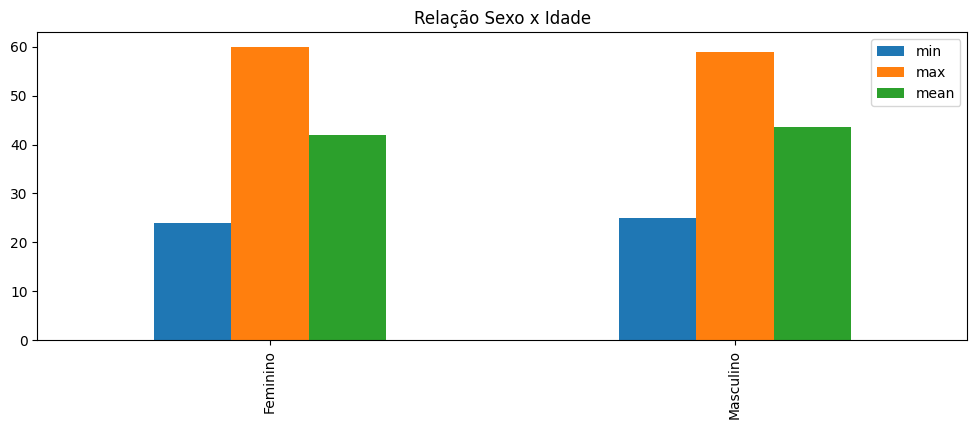

In [52]:
tb_sexo_idade.plot(kind='bar', figsize=(12, 4))
plt.title('Relação Sexo x Idade')
plt.xlabel('')

##### i) Análise por quantidade de filhos:

In [73]:
filhos_max = base['Qtd_Filhos'].max()
filhos_media = base['Qtd_Filhos'].mean()
filhos_zero = (base['Qtd_Filhos'] == 0).sum()
filhos_top = (base['Qtd_Filhos'] == base['Qtd_Filhos'].max()).sum()

print(filhos_max, filhos_media, filhos_zero, filhos_top)

5 1.59 33 2


In [72]:
tb_sexo_filhos = base.groupby('Sexo')['Qtd_Filhos'].agg(['min', 'max', 'mean'])
tb_sexo_filhos

,min,max,mean
Sexo,,,
Feminino,0,5,1.634615
Masculino,0,4,1.541667


In [75]:
texto_filhos = f"""
Em relação a quantidade de filhos, observa-se, na análise, que a média de filhos por cliente é de {filhos_media}.
Observa-se, também, que o número máximo de filhos que um(a) cliente tem é de {filhos_max}, sendo que a quantidade de clientes que tem o número máximo de filhos é de {filhos_top} clientes.
Foi possível observar, ainda, que a média de filhos por cliente homem é de {tb_sexo_filhos['mean'][1]:.2f}, e a média de filhos por cliente mulher é de {tb_sexo_filhos['mean'][0]:.2f}.
"""

print(texto_filhos)


Em relação a quantidade de filhos, observa-se, na análise, que a média de filhos por cliente é de 1.59.
Observa-se, também, que o número máximo de filhos que um(a) cliente tem é de 5, sendo que a quantidade de clientes que tem o número máximo de filhos é de 2 clientes.
Foi possível observar, ainda, que a média de filhos por cliente homem é de 1.54, e a média de filhos por cliente mulher é de 1.63.



##### j) Análise por renda:

In [77]:
base.head()

,ID_Cliente,Nome,Sobrenome,Data_Nascimento,Estado_Civil,Sexo,Renda_Anual,Qtd_Filhos,Escolaridade,Idade
0,1,Ruben,Torres,1985-08-07,Casado(a),Masculino,60000,3,Pós-graduado,39
1,2,Christy,Zhu,1988-02-10,Solteiro(a),Feminino,70000,0,Pós-graduado,36
2,3,Elizabeth,Johnson,1988-08-03,Solteiro(a),Feminino,80000,5,Pós-graduado,36
3,4,Julio,Ruiz,1985-07-31,Solteiro(a),Masculino,70000,0,Pós-graduado,39
4,5,Janet,Alvarez,1985-12-01,Solteiro(a),Feminino,70000,0,Pós-graduado,38


In [81]:
renda_min = base['Renda_Anual'].min()
renda_max = base['Renda_Anual'].max()
renda_media = base['Renda_Anual'].mean()

texto_renda = f'''
Em relação aos rendimentos, foi identificado que a renda média da base de clientes é de R$ {renda_media:_.2f} ao ano.
A maior renda que um(a) cliente possui é de R$ {renda_max:_.2f}, já a menor renda de um(a) cliente é de R$ {renda_min:_.2f}, também ao ano.
'''

print(texto_renda)


Em relação aos rendimentos, foi identificado que a renda média da base de clientes é de R$ 59_800.00 ao ano.
A maior renda que um(a) cliente possui é de R$ 170_000.00, já a menor renda de um(a) cliente é de R$ 10_000.00, também ao ano.



##### k) Relação sexo x renda:

In [83]:
tb_sexo_renda = base.groupby('Sexo')['Renda_Anual'].agg(['min', 'max', 'mean'])
tb_sexo_renda

,min,max,mean
Sexo,,,
Feminino,10000,130000,60769.230769
Masculino,10000,170000,58750.000000


In [87]:
texto_sexo_renda = f"""
Analisando a relação Sexo x Renda Anual, pode-se observar:

Clientes homens:
    - Renda mínima: R$ {tb_sexo_renda['min'][1]:_.2f};
    - Renda máxima: R$ {tb_sexo_renda['max'][1]:_.2f};
    - Renda média:  R$ {tb_sexo_renda['mean'][1]:_.2f}.

Clientes mulheres:
    - Renda mínima: R$ {tb_sexo_renda['min'][0]:_.2f};
    - Renda máxima: R$ {tb_sexo_renda['max'][0]:_.2f};
    - Renda média:  R$ {tb_sexo_renda['mean'][0]:_.2f}.
"""

texto_dif_media = f"\nObservou-se, durante a análise, que a renda média de clientes mulheres encontra-se abaixo da renda média de clientes homens."

texto_dif_max = f"\nObservou-se, ainda, que a renda máxima de clientes mulheres é de R$ {(tb_sexo_renda['max'][1] - tb_sexo_renda['max'][0]):_.2f} abaixo da renda máxima de clientes homens."

print(texto_sexo_renda)

if tb_sexo_renda['mean'][1] > tb_sexo_renda['mean'][0]:
    print(texto_dif_media)
if tb_sexo_renda['max'][1] > tb_sexo_renda['max'][0]:
    print(texto_dif_max)



Analisando a relação Sexo x Renda Anual, pode-se observar:

Clientes homens:
    - Renda mínima: R$ 10_000.00;
    - Renda máxima: R$ 170_000.00;
    - Renda média:  R$ 58_750.00.

Clientes mulheres:
    - Renda mínima: R$ 10_000.00;
    - Renda máxima: R$ 130_000.00;
    - Renda média:  R$ 60_769.23.


Observou-se, ainda, que a renda máxima de clientes mulheres é de R$ 40_000.00 abaixo da renda máxima de clientes homens.


Text(0.5, 0, '')

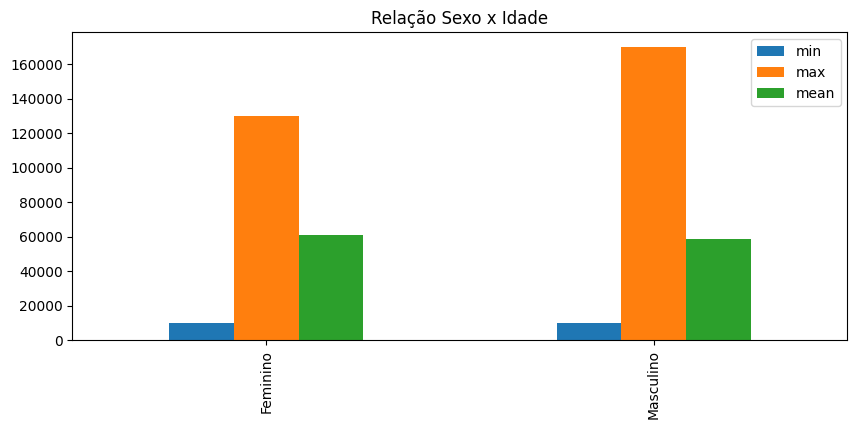

In [89]:
tb_sexo_renda.plot(kind='bar', figsize=(10, 4))
plt.title('Relação Sexo x Idade')
plt.xlabel('')

### Final da Análise da Base de Clientes.

---

### 6. Relatório Final de Análise:


Dada a base de clientes abaixo, segue sua análise:

In [91]:
base.head()

,ID_Cliente,Nome,Sobrenome,Data_Nascimento,Estado_Civil,Sexo,Renda_Anual,Qtd_Filhos,Escolaridade,Idade
0,1,Ruben,Torres,1985-08-07,Casado(a),Masculino,60000,3,Pós-graduado,39
1,2,Christy,Zhu,1988-02-10,Solteiro(a),Feminino,70000,0,Pós-graduado,36
2,3,Elizabeth,Johnson,1988-08-03,Solteiro(a),Feminino,80000,5,Pós-graduado,36
3,4,Julio,Ruiz,1985-07-31,Solteiro(a),Masculino,70000,0,Pós-graduado,39
4,5,Janet,Alvarez,1985-12-01,Solteiro(a),Feminino,70000,0,Pós-graduado,38


##### a) Total de clientes:

In [61]:
print(texto_total_clientes)

A base de dados analisada possui um total de 100 clientes cadastrados.


##### b) Análise por gênero:

A base de dados analisada possui 48 clientes do sexo Masculino e 52 do sexo Feminino.


Text(0, 0.5, '')

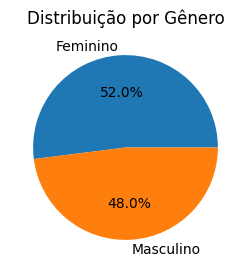

In [62]:
print(texto_qtd_genero)

base_genero = base['Sexo'].value_counts()
base_genero.plot(kind='pie', figsize=(6, 3), autopct='%1.1f%%')
plt.title('Distribuição por Gênero')
plt.ylabel('')

##### c) Análise por estado civil:

A base de dados analisada possui 56 clientes casado(a)s e 44 solteiro(a)s.


Text(0, 0.5, '')

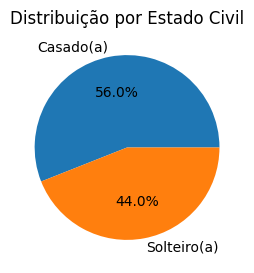

In [63]:
print(texto_qtd_ec)

base_ec = base['Estado_Civil'].value_counts()
base_ec.plot(kind='pie', figsize=(6, 3), autopct='%1.1f%%')
plt.title('Distribuição por Estado Civil')
plt.ylabel('')

##### d) Relação sexo x estado civil:

A proporção de homens casados é de 68.8%, enquanto a proporção de mulheres casadas é de 44.2%.


Text(0.5, 0, '')

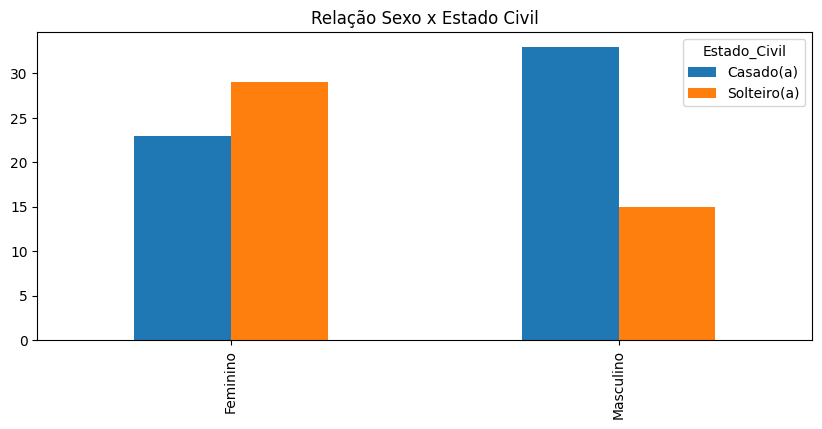

In [64]:
print(texto_sexo_ec)

tb_sexo_ec.plot(kind='bar', figsize=(10, 4))
plt.title('Relação Sexo x Estado Civil')
plt.xlabel('')

##### e) Análise por escolaridade:

Do total de clientes, 46 possuem nível de escolaridade Parcial, 27 possuem Nível Médio, 6 possuem Formação Fuperior e 21 Pós-graduação.


Text(0.5, 1.0, 'Distribuição de clientes por Escolaridade')

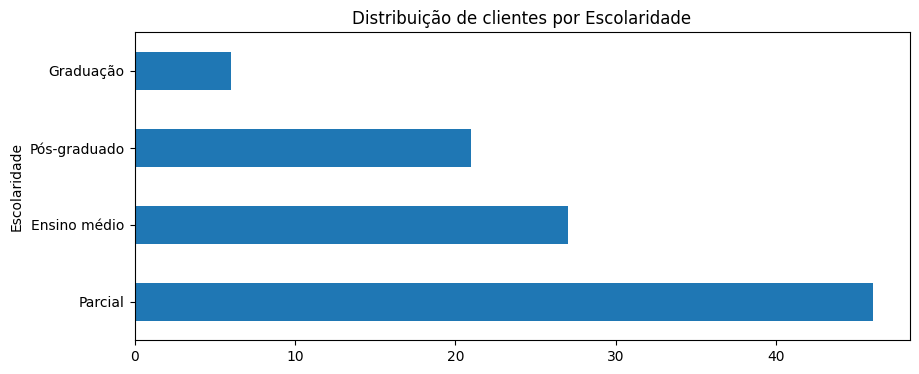

In [65]:
print(texto_esc)

base_esc = base['Escolaridade'].value_counts()
base_esc.plot(kind='barh', figsize=(10, 4))
plt.title('Distribuição de clientes por Escolaridade')

##### f) Relação sexo x escolaridade:


Relação Sexo x Escolaridade:

Conforme os dados analisados, dentre os clientes homens da base de dados em análise temos:
    - 52.1% possuem nível de escolaridade Parcial;
    - 22.9% possuem nível de escolaridade Médio;
    - 6.2% possuem nível de escolaridade Superior;
    - 18.8% possuem nível de escolaridade Pós-Graduação.

Já, dentre as clientes mulheres o cenário é:
    - 40.4% possuem nível de escolaridade Parcial;
    - 30.8% possuem nível de escolaridade Médio;
    - 5.8% possuem nível de escolaridade Superior;
    - 23.1% possuem nível de escolaridade Pós-Graduação.



Text(0.5, 0, '')

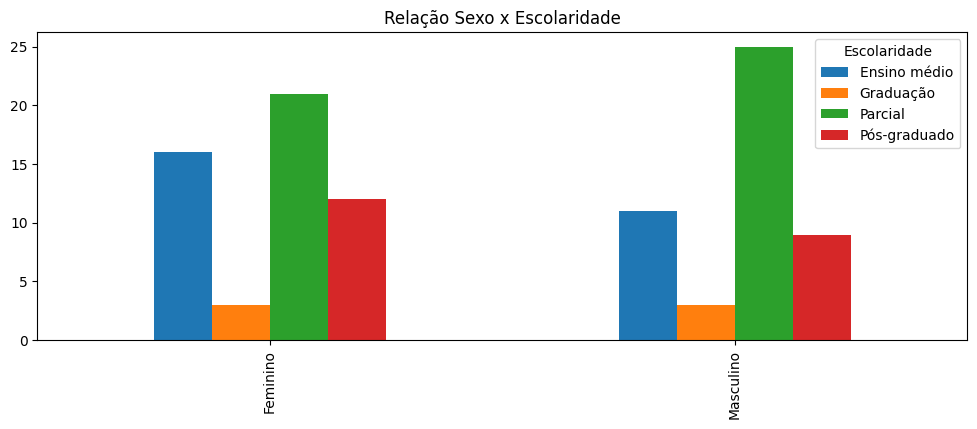

In [66]:
print(texto_sexo_esc)

tb_sexo_esc.plot(kind='bar', figsize=(12, 4))
plt.title('Relação Sexo x Escolaridade')
plt.xlabel('')

##### g) Análise por idade:

In [67]:
print(texto_idade)


Dentre os dados análisados, o(a) cliente mais jovem possui 24 anos, já o(a) cliente mais velho possui 60 anos.
A méida de idade da base de clientes analisada é de 42.74 anos.



##### h) Relação sexo x idade:


Relação Sexo x Idade:

Dentre os clientes homens, a idade mínima é de 25, a idade máxima é de 59. Já a média de idade dentre os homens é de 43.62.
Dentre as clientes mulheres, a idade mínima é de 24, a idade máxima é de 60. Já a média de idade dentre as mulheres é de 41.92.



Text(0.5, 0, '')

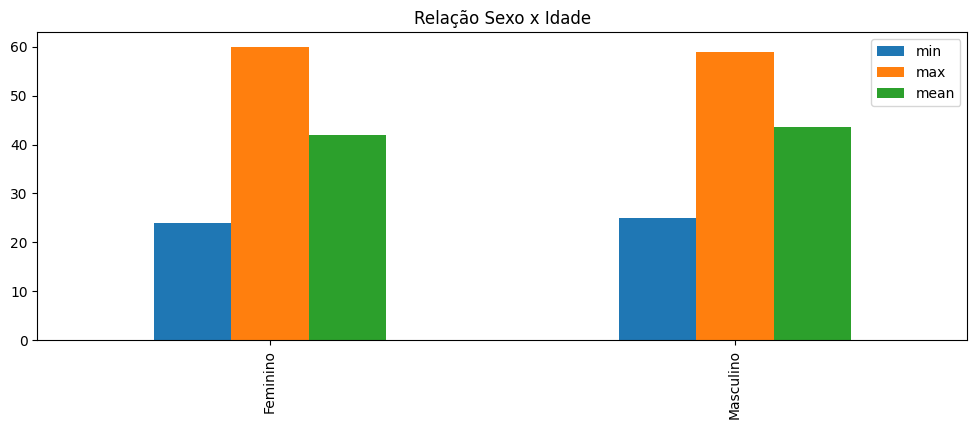

In [68]:
print(texto_sexo_idade)

tb_sexo_idade.plot(kind='bar', figsize=(12, 4))
plt.title('Relação Sexo x Idade')
plt.xlabel('')

##### i) Análise por quantidade de filhos:

In [76]:
print(texto_filhos)


Em relação a quantidade de filhos, observa-se, na análise, que a média de filhos por cliente é de 1.59.
Observa-se, também, que o número máximo de filhos que um(a) cliente tem é de 5, sendo que a quantidade de clientes que tem o número máximo de filhos é de 2 clientes.
Foi possível observar, ainda, que a média de filhos por cliente homem é de 1.54, e a média de filhos por cliente mulher é de 1.63.



##### j) Análise por renda:

In [82]:
print(texto_renda)


Em relação aos rendimentos, foi identificado que a renda média da base de clientes é de R$ 59_800.00 ao ano.
A maior renda que um(a) cliente possui é de R$ 170_000.00, já a menor renda de um(a) cliente é de R$ 10_000.00, também ao ano.



##### k) Relação sexo x renda:


Analisando a relação Sexo x Renda Anual, pode-se observar:

Clientes homens:
    - Renda mínima: R$ 10_000.00;
    - Renda máxima: R$ 170_000.00;
    - Renda média:  R$ 58_750.00.

Clientes mulheres:
    - Renda mínima: R$ 10_000.00;
    - Renda máxima: R$ 130_000.00;
    - Renda média:  R$ 60_769.23.


Observou-se, ainda, que a renda máxima de clientes mulheres é de R$ 40_000.00 abaixo da renda máxima de clientes homens.


Text(0.5, 0, '')

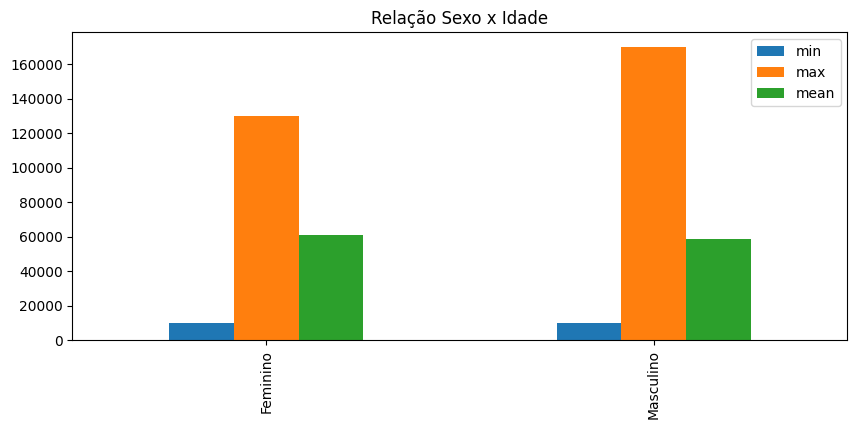

In [90]:
print(texto_sexo_renda)

if tb_sexo_renda['mean'][1] > tb_sexo_renda['mean'][0]:
    print(texto_dif_media)
if tb_sexo_renda['max'][1] > tb_sexo_renda['max'][0]:
    print(texto_dif_max)

tb_sexo_renda.plot(kind='bar', figsize=(10, 4))
plt.title('Relação Sexo x Idade')
plt.xlabel('')

Análise de dados da Base de Clientes realizada por Leonardo Araújo, em 22 de agosto de 2024.

##### Final do Relatório de Análise da Base de Clientes.

---